## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and briefly visualising data

In [2]:
train_data = pd.read_csv("fraudTrain.csv")

In [3]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Exploratory data analysis

### Missing data

In [5]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing values in the dataset.

### Correlation matrix

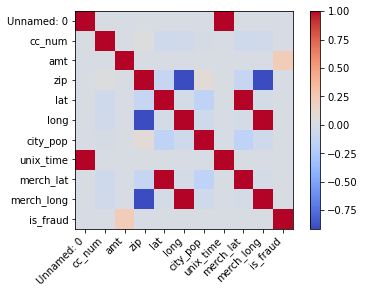

In [6]:
cor_mat = train_data.corr()
plt.imshow(cor_mat, cmap="coolwarm")
plt.colorbar()

variables = []
for col in train_data.columns:
    if train_data[col].dtypes in ["int64", "float64"]:
        variables.append(col)

plt.xticks(range(len(cor_mat)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_mat)), variables)

plt.show()

As expected, most of the integer or float columns have little to no correlation with the label "is_fraud". "amt" is the only such variable which shows some correlation. 
So, in order to achieve a parsimonious model, we drop all integer or float features except "amt".

### Dropping redundant columns

In [7]:
train_data.drop(axis=1, columns = ["Unnamed: 0", "cc_num", "zip", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"], inplace=True)

We drop some further redundant columns which would not contribute much to either the explanatory or predictive power of our model

In [8]:
train_data.drop(axis=1, columns=["trans_num", "street", "first", "last"], inplace=True)

### Data visualisations

In [9]:
train_data.head(10)

,trans_date_trans_time,merchant,category,amt,gender,city,state,job,dob,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0
5,2019-01-01 00:04:08,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,Dublin,PA,Transport planner,1961-06-19,0
6,2019-01-01 00:04:42,fraud_Rowe-Vandervort,grocery_net,44.54,F,Holcomb,KS,Arboriculturist,1993-08-16,0
7,2019-01-01 00:05:08,fraud_Corwin-Collins,gas_transport,71.65,M,Edinburg,VA,"Designer, multimedia",1947-08-21,0
8,2019-01-01 00:05:18,fraud_Herzog Ltd,misc_pos,4.27,F,Manor,PA,Public affairs consultant,1941-03-07,0
9,2019-01-01 00:06:01,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,Clarksville,TN,Pathologist,1974-03-28,0


In [10]:
# Dividing train dataset into 2 sections - fraudulent and non-fraudulent

fraud = train_data[train_data.is_fraud == 1]
not_fraud = train_data[train_data.is_fraud == 0]

#### By Category

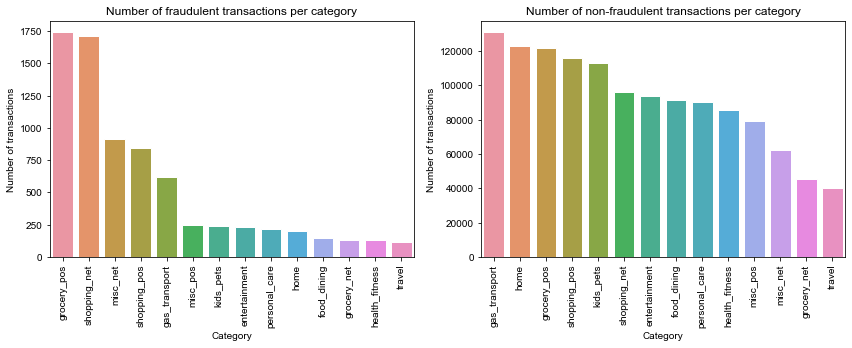

In [11]:
# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per category
cat_fraud = fraud.category.value_counts().reset_index()
cat_fraud.columns = ["Category", "Counts"]
cat_not_fraud = not_fraud.category.value_counts().reset_index()
cat_not_fraud.columns = ["Category", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per category
sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

#### By gender

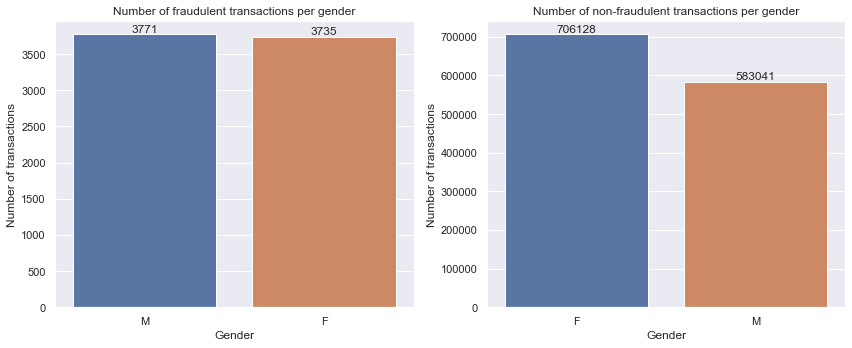

In [12]:
# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per gender
g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

We notice that there is no significant differences between the number of fraud victims with respect to gender. Women are involved in more transactions than men - 709863 transactions for the former compared to 586812 for the latter. Hence, around 0.64% of transactions involving men are fraudulent compared to 0.53% for women.

#### By age

In [13]:
# Extracting the transaction year
train_data["trans_year"] = pd.Series(pd.to_datetime(train_data.trans_date_trans_time)).dt.year
# Finding the birth year of each person
train_data["dob"] = pd.Series(pd.to_datetime(train_data.dob)).dt.year

In [14]:
# Calculating the age of each person and adding to train_data
age = pd.Series(train_data.trans_year - train_data.dob)
train_data["age"] = age

In [15]:
# Dividing individuals into age_groups
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
train_data["age_group"] = pd.cut(train_data['age'], bins=bins, labels=labels, right=True)

In [16]:
# Dropping age, trans_year and dob columns
train_data.drop(axis=1, columns=["age", "dob", "trans_year", "trans_date_trans_time"], inplace=True)

In [17]:
train_data.head(10)

,merchant,category,amt,gender,city,state,job,is_fraud,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",0,18-35
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0,35-60
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,0,35-60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,0,35-60
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,0,18-35
5,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,Dublin,PA,Transport planner,0,35-60
6,fraud_Rowe-Vandervort,grocery_net,44.54,F,Holcomb,KS,Arboriculturist,0,18-35
7,fraud_Corwin-Collins,gas_transport,71.65,M,Edinburg,VA,"Designer, multimedia",0,60+
8,fraud_Herzog Ltd,misc_pos,4.27,F,Manor,PA,Public affairs consultant,0,60+
9,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,Clarksville,TN,Pathologist,0,35-60


In [18]:
# Extracting fraudulent and non-fraudulent transactions by age_group
age_fraud = train_data[train_data.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = train_data[train_data.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

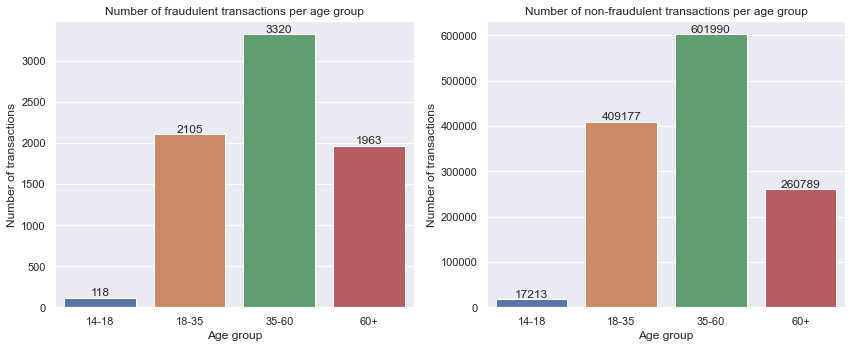

In [19]:
# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

We notice that teenagers are least likely to fall victim to credit card fraud. This might primarily be due to the considerably lower accessibility to credit cards for teenager compared to older individuals.

It is people in middle age groups who are more susceptible to credit card fraud as shown by the bar chart which might be explained by the the higher usage of credit cards within that age group.

The percentage of fraudulent transactions is highest among the people aged 60 or higher - it stands at 0.75%. This might be due to lower digital literacy.

#### By US region

In [20]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

train_data["Region"] = train_data.state.map(state_to_region)

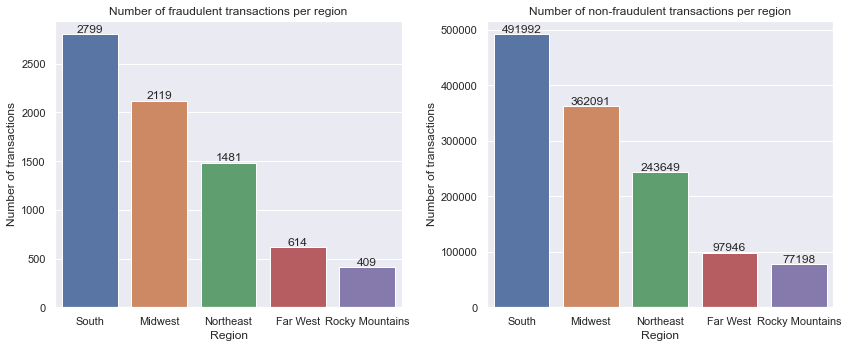

In [21]:
# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Extracting fraudulent and non-fraudulent transactions by region
r_fraud = train_data[train_data.is_fraud == 1].Region.value_counts().reset_index()
r_fraud.columns = ["Region", "Counts"]
r_not_fraud = train_data[train_data.is_fraud == 0].Region.value_counts().reset_index()
r_not_fraud.columns = ["Region", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

### "job" and "merchant" columns

There are 494 and 693 unique values in the "job" and "merchant" columns respectively which is far too much to establish a relationship between possibility of fraud and these variables. There is no clear way to group the values in these columns like we did with age and states. 

Hence, we choose not to include these variables as features in our model.

In [22]:
train_data.drop(axis=1, columns=["job", "merchant"], inplace=True)

## Logistic Regression

### One hot encoding and dropping columns not to be included in the model

In [23]:
train_data = pd.get_dummies(train_data, columns = ["category", "gender", "Region", "age_group"], drop_first=True)

In [24]:
train_data.drop(axis=1, columns=["city", "state"], inplace=True)

### Identifying features and label

In [25]:
features = train_data.drop(axis=1, columns=["is_fraud"], inplace=False)
label = train_data["is_fraud"]

### Importing relevant libraries, functions and methods

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Training logistic regression model

In [27]:
log_model = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42)
log_model.fit(features, label)

C:\Users\Rusmaully\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, random_state=42)

### Importing and preparing test data

In [28]:
# Importing test dataset
test = pd.read_csv("fraudTest.csv")

In [29]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [30]:
# Dropping redundant columns
test.drop(axis=1, columns=["Unnamed: 0", "cc_num", "merchant", "first", "last", "street", "city", "zip", "lat", "long", "city_pop", "job", "trans_num", "unix_time", "merch_lat", "merch_long"], inplace=True)

In [31]:
# Adding "Region" column to test data
test["Region"] = test.state.map(state_to_region)

In [32]:
# Adding age group column 
test["trans_year"] = pd.Series(pd.to_datetime(test.trans_date_trans_time)).dt.year
test["dob"] = pd.Series(pd.to_datetime(test.dob)).dt.year

age = pd.Series(test.trans_year - test.dob)
test["age"] = age

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
test["age_group"] = pd.cut(test['age'], bins=bins, labels=labels, right=True)

In [33]:
# Dropping all remaining redundant columns
test.drop(axis=1, columns=["dob", "trans_year", "trans_date_trans_time", "age", "state"], inplace=True)

In [34]:
# One hot encoding
test = pd.get_dummies(test, columns=["category", "gender", "Region", "age_group"], drop_first=True)

In [35]:
# Extracting features and label from test data
test_f = test.drop(axis=1, columns=["is_fraud"], inplace=False)
test_l = test["is_fraud"]

### Model predictions and diagnostics

In [36]:
pred = log_model.predict(test_f)

In [37]:
# Accuracy score
accuracy = accuracy_score(test_l, pred)
accuracy

0.9955930965110065

This is a very high accuracy score and it might be misleading due to the significant class imbalance in the dataset with non-fraudulent transactions naturally outnumbering fraudulent transactions. So we carry out some further investigations.

In [38]:
# Adding predictions to dataset
test["predictions"] = pred

# Comparing the number of fraudulent transactions in the dataset and the number of such transactions predicted by the model
actual_fraud = test.is_fraud.value_counts()[1]
pred_fraud = test[test.is_fraud == 1].predictions.value_counts()[1]

actual_fraud, pred_fraud

(2145, 8)

We observe that the model indeed has a significant number of false negatives. Only 8 out of 2145 fraudulent transactions are predicted accurately. This shows that our model is indeed biased towards predicting no fraud.

We investigate this further with a confusion matrix

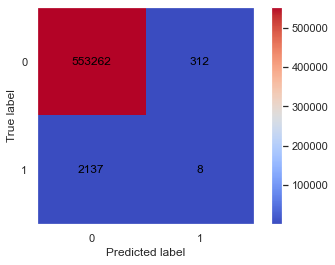

In [39]:
cm = confusion_matrix(test_l, pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
matrix.plot(cmap="coolwarm")
for text in matrix.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

It is very clear in this confusion matrix that the model fails to identify fraudulent transactions and is heavily biased towards predicting no fraud.

## Logistic Regression with class weights

In [40]:
model2 = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42, class_weight="balanced")
model2.fit(features, label)

C:\Users\Rusmaully\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', fit_intercept=False,
                   random_state=42)

In [41]:
pred2 = model2.predict(test_f)
accuracy2 = accuracy_score(test_l, pred2)
accuracy2

0.8590510671760369

We have a much lower accuracy this time but this may be an indication that the bias resulting from the class imbalance has been mitigated. We plot the confusion matrix for a better idea.

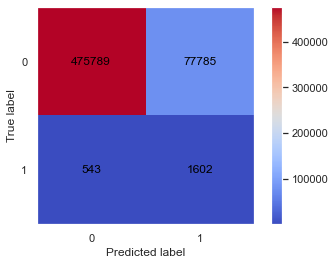

In [42]:
cm2 = confusion_matrix(test_l, pred2)
matrix2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
matrix2.plot(cmap="coolwarm")
for text in matrix2.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

Although the model is now less biased towards wrongly classifying fraudulent transactions as non-fraudulent, the model has an underwhelming accuracy as demonstrated by the many false negatives and false positives.

## Random Forest

In [43]:
# Import relevant function
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(features, label)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
rf_pred = rf.predict(test_f)

In [46]:
accuracy = accuracy_score(test_l, rf_pred)
accuracy

0.9963506736318175

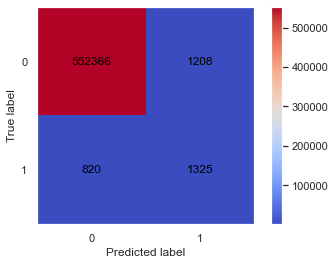

In [47]:
rf_cm = confusion_matrix(test_l, rf_pred)
rf_mat = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
rf_mat.plot(cmap="coolwarm")
for text in rf_mat.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

The Random Forest model is far superior to the logistic regression model both in terms of accuracy and its handling of the class imbalance by minimising the number of false negatives and false positives.

## Logistic Regression vs Random Forest

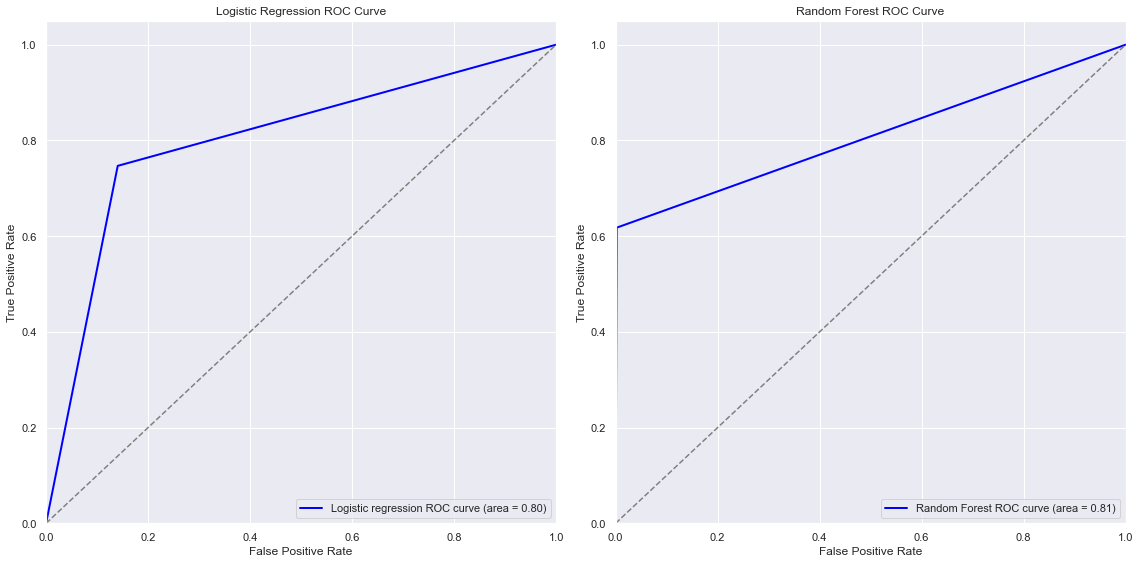

In [48]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr_log, tpr_log, roc_thresholds_log = roc_curve(test_l, pred2)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, roc_thresholds_rf = roc_curve(test_l, rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic regression ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()